In [117]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [91]:
#importing data
train = pd.read_csv("train.csv")

In [92]:
#filter our data
data = train[['Pclass', 'Sex', 'Age', 'Fare']]

#convert women and men to 1's and 0's
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})

#take out NULL in Age
data['Age'] = data['Age'].fillna(30)

#take out NULL in Embarked
data['Fare'] = data['Fare'].fillna(8.05)

data['Survived'] = ""
print(data)

     Pclass  Sex   Age     Fare Survived
0         3    0  22.0   7.2500         
1         1    1  38.0  71.2833         
2         3    1  26.0   7.9250         
3         1    1  35.0  53.1000         
4         3    0  35.0   8.0500         
..      ...  ...   ...      ...      ...
886       2    0  27.0  13.0000         
887       1    1  19.0  30.0000         
888       3    1  30.0  23.4500         
889       1    0  26.0  30.0000         
890       3    0  32.0   7.7500         

[891 rows x 5 columns]


c:\users\john murphy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\john murphy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\john murphy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

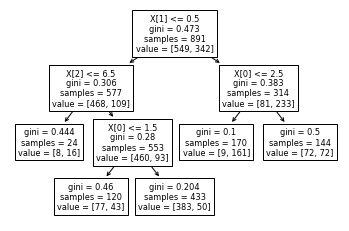

In [110]:
#tree plot
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
Y = train['Survived']
model = DecisionTreeClassifier(criterion= 'gini', max_depth = 5, max_leaf_nodes= 5)
model.fit(X,Y)

tree.plot_tree(model)
plt.show()

In [111]:
#5 folds decision tree
folds = sklearn.model_selection.cross_val_score(model, X, Y, cv= 5)
print(folds)

[0.75418994 0.80337079 0.80898876 0.79213483 0.81460674]


In [119]:
#random forest
forest = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=1)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [123]:
#5 folds random forest
forestfold = sklearn.model_selection.cross_val_score(forest, X, Y, cv= 5)
print(forestfold)

[0.77094972 0.79775281 0.84269663 0.79775281 0.81460674]
